In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
data = pd.read_csv('/content/titanic_train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

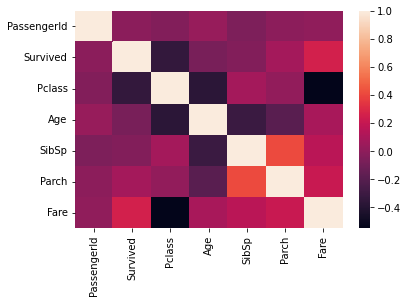

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace= True)

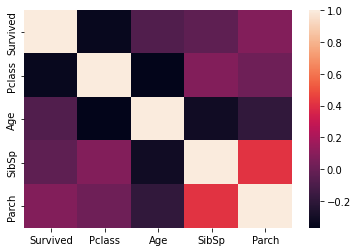

In [ ]:
sns.heatmap(data.corr())

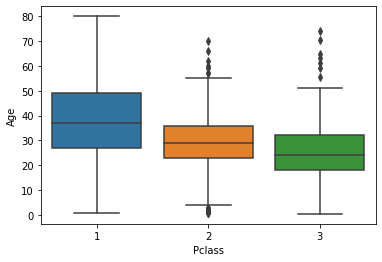

In [ ]:
sns.boxplot(x = 'Pclass', y = 'Age', data = data) 
#mean:
#  for class 1 >>> 38
#  for class 2 >>> 29
#  for class 3 >>> 25

In [ ]:
def fill_null_values(series):
  age = series[0]
  pclass = series[1]
  if pd.isna(age):
    if pclass == 1:
      return 38
    elif pclass == 2:
      return 29
    else:
      return 25
  else:
    return age

In [ ]:
data['Age'] = data[['Age', 'Pclass']].apply(fill_null_values, axis= 1)

In [ ]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [ ]:
output = data.pop('Survived')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, output, test_size= 0.3, random_state= 42)

In [ ]:
clf = svm.SVC()
param_grid = {'kernel': ['linear', 'rbf', 'poly']}
model = GridSearchCV(clf, param_grid, cv = 5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
model.best_params_

{'kernel': 'linear'}

In [ ]:
clf = svm.SVC(kernel='linear')
param_grid = {'C': np.arange(1,5)}
model = GridSearchCV(clf, param_grid, cv = 5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1, 2, 3, 4])})

In [ ]:
model.best_params_

{'C': 1}

In [ ]:
clf = svm.SVC(kernel='linear', C = 1)
clf.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
score = cross_val_score(clf, data, output, cv = 5)
print(np.mean(score))

0.7867365513778168


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


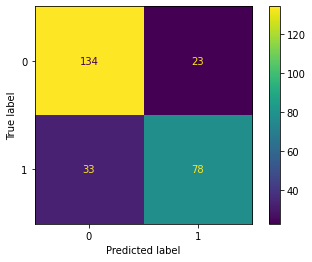

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)

In [ ]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["died", "alive"]))

              precision    recall  f1-score   support

        died       0.80      0.85      0.83       157
       alive       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,5)}
model = GridSearchCV(knn, param_grid, cv = 5)
model.fit(scaled, output)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [ ]:
model.best_params_

{'n_neighbors': 3}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(scaled, output)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
score = cross_val_score(knn, scaled, output, cv = 5)
print(np.mean(score))

0.8137467830016949
